# Notebook 9: Confidence Intervals - Solutions 
***

We'll need Numpy, Matplotlib, Pandas, and scipy.stats for this notebook, so let's load them. 

In [6]:
import numpy as np 
from scipy import stats
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.stats.api as sms
%matplotlib inline

### Summary of Built-In Python Functions for Hypothesis Tests:
***

This list is by no means comprehensive - it just covers the scope of hypothesis tests we will use in this class:


**Hypothesis test for a sample proportion**:  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binomtest.html

 - `stats.binomtest(140, 250, p=0.5, alternative='two-sided')`

or, using the normal approximation to the binomial thanks to the central limit theorem (assuming $n\hat{p} \geq 15$ and $n(1-\hat{p}) \geq 15$) we can use a z-test.  This will give us similar results as above as our sample sizes get larger: https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html
 - `sms.proportions_ztest(count=140, nobs=250, value=0.50, prop_var=.5)`
 
 Assumptions:
 
 - Independent binomial random sample
 - Each observation in the sample data is independent of every other observation.  
 - $n\hat{p}\geq 15$ and $n(1-\hat{p})\geq 15$

**Hypothesis test for difference in sample proportions (null hypothesis difference is assumed to be 0, but can be changed with the "value" input)**:
https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.test_proportions_2indep.html

Assumptions:
 - Two independent binomial random samples
 - Each observation in the sample data is independent of every other observation.  
 - $n_1\hat{p_1}\geq 15$ and $n_1(1-\hat{p_1})\geq 15$ and $n_2\hat{p_2}\geq 15$ and $n_2(1-\hat{p_2})\geq 15$



OPTION 1:

 - `sms.test_proportions_2indep(count1, nobs1, count2, nobs2, value=None, compare='diff', alternative='two-sided')`
 
 (OR, the following will also give similar results as above as the sample sizes get larger.  The difference is in the method of how to calculate variance, but for our purposes the differences between these tests will be neglibile so you can use either): 

OPTION 2:

`sms.proportions_ztest([count1, count2], [nobs1, nobs2], prop_var=(count1+count2)/(nobs1+nobs2))`
 



**Hypothesis Test for difference in sample means**: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

 - Two independent random samples 
 - $n_1 \geq 30$ and $n_2 \geq 30$  OR if less than 30 data points, data has been sampled from an approximately normal distribution
- Requires an assumption about population variances:  If you don't have info to assume they're equal input `equal_var = False`
 


 - `res = stats.ttest_ind(SamplePageA,SamplePageB, equal_var=False)`
 - `print(f'p-value for two sided test: {res.pvalue:.4f}')`




### Exercise 1 - Sampling Confidence Intervals 
*** 

In this exercise we'll get some experience implementing confidence intervals for samples of a population.  Suppose that we wish to sample household incomes from a population in units of hundreds-of-thousands of dollars.  In general it is not necessary that we know the distribution that the quantity of interest follows, but in this case we'll assume that household $\color{red}{\text{income follows a Weibull distribution}}$.

Weibull documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html

We can draw samples from this population and plot the histogram as follows: 

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
x = stats.weibull_min.rvs(loc=0.1, c=1.3, size=10000)
  # 10,000 randomly generated draws from this Weibull distribution stored in x.
  # The histogram reveals the shape of the distribution we are working with.
pd.Series(x).hist(ax=ax, color="steelblue", edgecolor="white", bins=20, density=True)
  # A histogram of x
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlabel("Income in Hundreds of Thousands of Dollars", fontsize=16)
ax.set_ylabel("Density", fontsize=16)
ax.set_title("Density of Income", fontsize=20);

**Part A**: Complete the following $\color{red}{\text{function that draws 20 independent samples of size}}$ $\color{red}{n}$ from the population and plots confidence intervals for each sample against the mean.  Because we know the distribution from sampling from, we can use the exact mean and variance in the determination of the confidence intervals.   

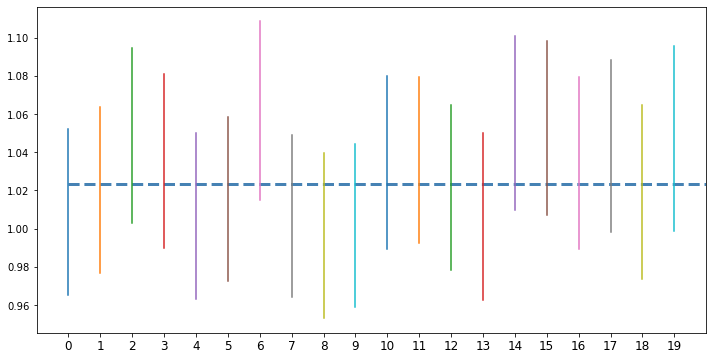

In [2]:
def income_CI(n=100, alpha=.05):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    
    # Get the true mean and variance of the distribution 
    mean, var = stats.weibull_min.stats(loc=0.1, c=1.3, moments='mv')
    # 'moments' is a reserved word. 'm' is mean. 'v' is variance. 's' is skew. 'k' is kurtosis.
    
    ax.plot([0,20], [mean, mean], color="steelblue", ls='--', lw=3)
    # .plot plots a line from (0, mean) to (20, mean). i.e. Horizontal at height 'mean'.
    # ls is line style, and lw is line width
    
    # Now, draw 20 independent samples of size n 
    for sId in range(20):
        # Draw samples from Weibull distribution 
        x = stats.weibull_min.rvs(loc=0.1, c=1.3, size=n)
        # 100 random choices from the Weibull are now stored in x
      
        #Calculate the confidence interval for the mean using built-in Python function:      
        (CImin, CImax) = stats.t.interval(1-alpha, df=len(x)-1, loc=np.mean(x), scale=stats.sem(x))
       
        ax.plot([sId, sId], [CImin, CImax])
        
        
    ax.set_xlim([-1,20])
    plt.xticks(range(20), fontsize=12)

# Now, call the function        
income_CI(n=1000)


### Built-In Python Functions for Calculating Confidence Intervals:

**CI for a sample mean**  (Using a t-interval):
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

Assumptions:  
 - Data points have been collected using a random sampling method.
 - Each observation in the sample data is independent of every other observation.  
 - $n \geq 30$  OR if less than 30 data points, data has been sampled from an approximately normal distribution
 
 **Input heads up:**  Notice in THIS function, alpha represents the confidence level (which is an unfortunate default in Python, since mathematically we define alpha = 1- confidence level).

`stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))` 


**CI for sample proportion**     
(https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportion_confint.html)

Assumptions:
 - Data has been sampled from a binomial distribution
 - Data points have been collected using a random sampling method.
 - Each observation in the sample data is independent of every other observation.  
 - $n\hat{p}\geq 15$ and $n(1-\hat{p})\geq 15$ (when using the default method = 'normal')


 - `sms.proportion_confint(count, nobs, alpha=0.05, method='normal')`


**CI for difference in sample proportions:**

Assumptions:
 - Two independent binomial random samples
 - $n_1\hat{p_1}\geq 15$ and $n_1(1-\hat{p_1})\geq 15$ and $n_2\hat{p_2}\geq 15$ and $n_2(1-\hat{p_2})\geq 15$

https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.confint_proportions_2indep.html
 - `sms.confint_proportions_2indep(count1, nobs1, count2, nobs2, alpha=0.05)`

**CI for difference in sample means:**:

Assumptions:
 - Two independent random samples
 - Each observation in the sample data is independent of every other observation.  
 - $n \geq 30$  OR if less than 30 data points, data has been sampled from an approximately normal distribution
 - Requires an assumption about population variances:  If you don't have info to assume they're equal input `equal_var = False`
 

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.html
Use both lines:
 - `cm=sms.CompareMeans(sms.stats.DescrStatsW(dataset1),sms.DescrStatsW(dataset2))`

 - `cm.tconfint_diff(alpha=0.05, usevar='unequal'))`



### Exercise 2 - Single Sample CI
*** 
Load `hubble.csv` into Python. A description of the variables can be obtained from page 73 of https://cran.r-project.org/web/packages/gamair/gamair.pdf.  

In [8]:
# Path to the data - select the path that works for you 
file_path = 'hubble.csv'

# Load the data into a DataFrame 
df = pd.read_csv(file_path)

# Look at the data
df.describe()


,Unnamed: 0,y,x
count,24.000000,24.00000,24.000000
mean,12.500000,924.37500,12.054583
std,7.071068,512.81396,5.814649
min,1.000000,80.00000,2.000000
25%,6.750000,616.50000,8.530000
50%,12.500000,827.00000,13.080000
75%,18.250000,1423.25000,15.870000
max,24.000000,1794.00000,21.980000


In [9]:
# Check the data types
df.dtypes

Unnamed: 0      int64
Galaxy         object
y               int64
x             float64
dtype: object

#### (a) Calculate the 85% confidence interval for the mean of a galaxy's distance from Earth in Mega parsecs in Python using built-in functions.     (Note: 'x' is distance and 'y' is velocity as mentioned on page 73 of the documentation)

In [10]:
#This is asking for a confidence interval for a sample mean, so we use:

stats.t.interval(0.85, df=len(df['x'])-1, loc=np.mean(df['x']), scale=stats.sem(df['x']))

(10.286945414441828, 13.822221252224836)

#### (b) Interpret the confidence interval.

 85% of intervals created in this manner will contain the true mean of a galaxy's distance from Earth. This is one such interval. This claim means that, if we were to collect these measurements over and over again and calculate the confidence interval for each sample, then about 85% of the CI's would contain the true mean.

### Exercise 2 - Two Sample CI
*** 
Load `clean_titanic_data` into Python.

In [11]:
# Path to the data - select the path that works for you 
file_path = 'clean_titanic_data.csv'

# Load the data into a DataFrame 
df = pd.read_csv(file_path)

# Look at the data.
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
6,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
7,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
8,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
9,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S


#### a) Calculate a 98% CI for the survival rate of men (all passenger classes).

In [12]:
male_survived = df.loc[df['Sex']=='male', 'Survived'].sum()
print("{} men survived the disaster".format(male_survived))
male_total = len(df.loc[(df["Sex"]=='male')])
print("... out of {} men total".format(male_total))


##This is looking for a confidence interval for a sample proportion, so we use:
sms.proportion_confint(male_survived, male_total, alpha=0.02, method='normal')



93 men survived the disaster
... out of 453 men total


(0.1611490936776798, 0.24944693281238642)


#### c) Calculate a 98% CI for the survival rate of women (all passenger classes).

In [13]:
female_survived = df.loc[df['Sex']=='female', 'Survived'].sum()
print("{} females survived the disaster".format(female_survived))
female_total = len(df.loc[(df["Sex"]=='female')])
print("... out of {} females total".format(male_total))


##This is looking for a confidence interval for a sample proportion, so we use:
sms.proportion_confint(female_survived, female_total, alpha=0.02, method='normal')

197 females survived the disaster
... out of 453 females total


(0.692839887327238, 0.8167386567340648)


#### d) Calculate a 98% CI for the difference in survival rates between men and women.

In [14]:
###We're looking for a CI for difference in proportions, so we use:

sms.confint_proportions_2indep(male_survived, male_total, female_survived, female_total, alpha=0.02)

(-0.6189199417821688, -0.4675949971971381)


#### e) What can you conclude?

**Soln:**
**Interpretation in terms of a hypothesis test:**
Since this confidence interval does NOT include 0 we know that a hypothesis test testing the null hypothesis that the survival rates were equal would have resulted in rejecting the null using this sample data.   Thus we can conclude that based on this sample the difference between survival rates is significant at the 2% significance level.  

(Recall:  Given a particular sample statistic, the 98% confidence interval is the interval centered on that statistic of all possible null hypotheses that would not be rejected (based on that specific statistic) at the 2% significance level.)


**Interpretation in terms of difference between survival rates:** 
If repeated samples were taken and the 98% confidence interval were computed for each sample, 98% of those intervals would contain the true difference in survival rates between men and women.  This is one such interval.


That said, we also know that it may have varied quite a bit depending on passenger class and age (our sample was not stratified), and we don't know yet how to compare across multiple variables at once.

But stay tuned for regression!
